In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import os
# import seaborn as sns

from matplotlib import rc
plt.rc('text', usetex=True)


In [3]:
dirName = 'schedule'
if not os.path.exists(dirName):
    os.mkdir(dirName)

In [10]:
def frange_cycle_linear(start, stop, n_epoch, n_cycle=4, ratio=0.5):
    L = np.ones(n_epoch)
    period = n_epoch/n_cycle
    step = (stop-start)/(period*ratio) # linear schedule

    for c in range(n_cycle):

        v , i = start , 0
        while v <= stop and (int(i+c*period) < n_epoch):
            L[int(i+c*period)] = v
            v += step
            i += 1
    return L    


def frange_cycle_sigmoid(start, stop, n_epoch, n_cycle=4, ratio=0.5):
    L = np.ones(n_epoch)
    period = n_epoch/n_cycle
    step = (stop-start)/(period*ratio) # step is in [0,1]
    
    # transform into [-6, 6] for plots: v*12.-6.

    for c in range(n_cycle):

        v , i = start , 0
        while v <= stop and (int(i + c * period) < n_epoch):
            L[int(i+c*period)] = 1.0/(1.0+ np.exp(- (v*12.-6.)))
            v += step
            i += 1
    return L    


#  function  = 1 − cos(a), where a scans from 0 to pi/2

def frange_cycle_cosine(start, stop, n_epoch, n_cycle=4, ratio=0.5):
    L = np.ones(n_epoch)
    period = n_epoch/n_cycle
    step = (stop-start)/(period*ratio) # step is in [0,1]
    
    # transform into [0, pi] for plots: 

    for c in range(n_cycle):

        v , i = start , 0
        while v <= stop and (int(i + c * period) < n_epoch):
            L[int(i+c*period)] = 0.5-.5*math.cos(v*math.pi)
            v += step
            i += 1
    return L    

def frange(start, stop, step, n_epoch):
    L = np.ones(n_epoch)
    v , i = start , 0
    while v <= stop:
        L[i] = v
        v += step
        i += 1
    return L


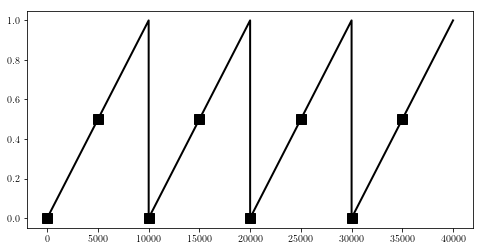

In [11]:
n_epoch = 40000
beta_np_cyc = frange_cycle_linear(0.0, 1.0, n_epoch, 4, 1.0)

fig=plt.figure(figsize=(8,4.0))
stride = max( int(n_epoch / 8), 1)

plt.plot(range(n_epoch), beta_np_cyc, '-', label='Cyclical', marker= 's', color='k', markevery=stride,lw=2,  mec='k', mew=1 , markersize=10)
plt.show()

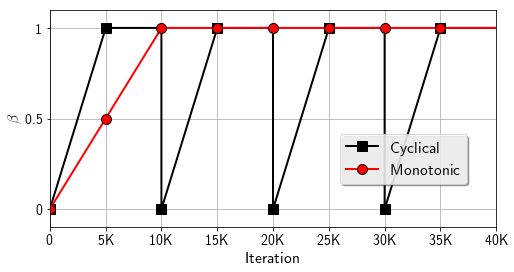

In [20]:
n_epoch = 40000
beta_np_cyc = frange_cycle_linear(0.0, 1.0, n_epoch, 4)
beta_np_inc = frange_cycle_linear(0.0, 1.0, n_epoch, 1, 0.25)
beta_np_con = np.ones(n_epoch)

fig=plt.figure(figsize=(8,4.0))
stride = max( int(n_epoch / 8), 1)

plt.plot(range(n_epoch), beta_np_cyc, '-', label='Cyclical', marker= 's', color='k', markevery=stride,lw=2,  mec='k', mew=1 , markersize=10)
plt.plot(range(n_epoch), beta_np_inc, '-', label='Monotonic', marker= 'o', color='r', markevery=stride,lw=2,  mec='k', mew=1 , markersize=10)

leg = plt.legend(fontsize=16, shadow=True, loc=(0.65, 0.2))
plt.grid(True)

plt.xlabel('# Iteration', fontsize=16)
plt.ylabel("$\\beta$", fontsize=16)

ax = plt.gca() 

# X-axis label
plt.xticks( (0, 5*1000, 10*1000, 15*1000, 20*1000, 25*1000, 30*1000, 35*1000, 40*1000), \
           ('0','5K','10K','15K','20K','25K','30K','35K','40K'), color='k', size=14)

# Left Y-axis labels
plt.yticks((0.0, 0.5, 1.0), ('0', '0.5','1'), color='k', size=14)

plt.xlim(0,n_epoch)
plt.ylim(-0.1,1.1)

plt.show()

fig.savefig(dirName+'/beta_iteration_linear.pdf', bbox_inches='tight')

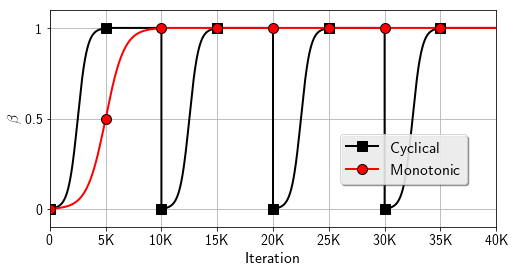

In [22]:
n_epoch = 40000
beta_np_cyc = frange_cycle_sigmoid(0.0, 1.0, n_epoch, 4)
beta_np_inc = frange_cycle_sigmoid(0.0, 1.0, n_epoch, 1, 0.25)
beta_np_con = np.ones(n_epoch)

fig=plt.figure(figsize=(8,4.0))
stride = max( int(n_epoch / 8), 1)

plt.plot(range(n_epoch), beta_np_cyc, '-', label='Cyclical', marker= 's', color='k', markevery=stride,lw=2,  mec='k', mew=1 , markersize=10)
plt.plot(range(n_epoch), beta_np_inc, '-', label='Monotonic', marker= 'o', color='r', markevery=stride,lw=2,  mec='k', mew=1 , markersize=10)

leg = plt.legend(fontsize=16, shadow=True, loc=(0.65, 0.2))
plt.grid(True)

plt.xlabel('# Iteration', fontsize=16)
plt.ylabel("$\\beta$", fontsize=16)

ax = plt.gca() 

# X-axis label
plt.xticks( (0, 5*1000, 10*1000, 15*1000, 20*1000, 25*1000, 30*1000, 35*1000, 40*1000), \
           ('0','5K','10K','15K','20K','25K','30K','35K','40K'), color='k', size=14)

# Left Y-axis labels
plt.yticks((0.0, 0.5, 1.0), ('0', '0.5','1'), color='k', size=14)

plt.xlim(0,n_epoch)
plt.ylim(-0.1,1.1)

plt.show()

fig.savefig(dirName+'/beta_iteration_sigmoid.pdf', bbox_inches='tight')

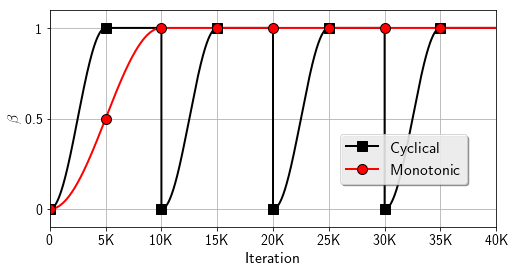

In [23]:
n_epoch = 40000
beta_np_cyc = frange_cycle_cosine(0.0, 1.0, n_epoch, 4)
beta_np_inc = frange_cycle_cosine(0.0, 1.0, n_epoch, 1, 0.25)
beta_np_con = np.ones(n_epoch)

fig=plt.figure(figsize=(8,4.0))
stride = max( int(n_epoch / 8), 1)

plt.plot(range(n_epoch), beta_np_cyc, '-', label='Cyclical', marker= 's', color='k', markevery=stride,lw=2,  mec='k', mew=1 , markersize=10)
plt.plot(range(n_epoch), beta_np_inc, '-', label='Monotonic', marker= 'o', color='r', markevery=stride,lw=2,  mec='k', mew=1 , markersize=10)

leg = plt.legend(fontsize=16, shadow=True, loc=(0.65, 0.2))
plt.grid(True)

plt.xlabel('# Iteration', fontsize=16)
plt.ylabel("$\\beta$", fontsize=16)

ax = plt.gca() 

# X-axis label
plt.xticks( (0, 5*1000, 10*1000, 15*1000, 20*1000, 25*1000, 30*1000, 35*1000, 40*1000), \
           ('0','5K','10K','15K','20K','25K','30K','35K','40K'), color='k', size=14)

# Left Y-axis labels
plt.yticks((0.0, 0.5, 1.0), ('0', '0.5','1'), color='k', size=14)

plt.xlim(0,n_epoch)
plt.ylim(-0.1,1.1)

plt.show()

fig.savefig(dirName+'/beta_iteration_cosine.pdf', bbox_inches='tight')

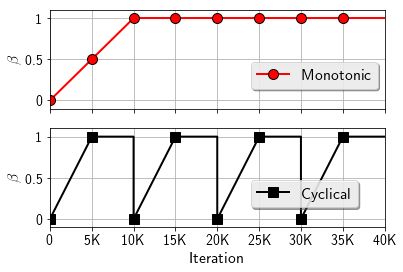

In [27]:
n_epoch = 40000
beta_np_cyc = frange_cycle_linear(0.0, 1.0, n_epoch, 4)
beta_np_inc = frange_cycle_linear(0.0, 1.0, n_epoch, 1, 0.25)
beta_np_con = np.ones(n_epoch)

fig=plt.figure(figsize=(6,4.0))
stride = max( int(n_epoch / 8), 1)


plt.subplot(211)
plt.plot(range(n_epoch), beta_np_inc, '-', label='Monotonic', marker= 'o', color='r', markevery=stride,lw=2,  mec='k', mew=1 , markersize=10)

leg = plt.legend(fontsize=16, shadow=True, loc=(0.6, 0.2))
plt.grid(True)

plt.ylabel("$\\beta$", fontsize=16)

ax = plt.gca() 

# X-axis label
plt.xticks( (0, 5*1000, 10*1000, 15*1000, 20*1000, 25*1000, 30*1000, 35*1000, 40*1000), \
            (' ',' ',' ',' ',' ',' ',' ',' ',' '), color='k', size=14)

# Left Y-axis labels
plt.yticks((0.0, 0.5, 1.0), ('0', '0.5','1'), color='k', size=14)

plt.xlim(-10,n_epoch)
plt.ylim(-0.1,1.1)


plt.subplot(212)
plt.plot(range(n_epoch), beta_np_cyc, '-', label='Cyclical', marker= 's', color='k', markevery=stride,lw=2,  mec='k', mew=1 , markersize=10)


leg = plt.legend(fontsize=16, shadow=True, loc=(0.6, 0.2))
plt.grid(True)

plt.xlabel('# Iteration', fontsize=16)
plt.ylabel("$\\beta$", fontsize=16)

ax = plt.gca() 

# X-axis label
plt.xticks( (0, 5*1000, 10*1000, 15*1000, 20*1000, 25*1000, 30*1000, 35*1000, 40*1000), \
           ('0','5K','10K','15K','20K','25K','30K','35K','40K'), color='k', size=14)

# Left Y-axis labels
plt.yticks((0.0, 0.5, 1.0), ('0', '0.5','1'), color='k', size=14)

plt.xlim(-10,n_epoch)
plt.ylim(-0.1,1.1)

plt.show()

fig.savefig(dirName+'/beta_iteration_linear2.pdf', bbox_inches='tight')



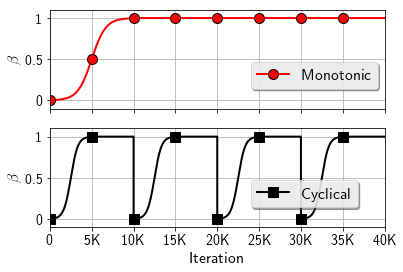

In [26]:
n_epoch = 40000
beta_np_cyc = frange_cycle_sigmoid(0.0, 1.0, n_epoch, 4)
beta_np_inc = frange_cycle_sigmoid(0.0, 1.0, n_epoch, 1, 0.25)
beta_np_con = np.ones(n_epoch)

fig=plt.figure(figsize=(6,4.0))
stride = max( int(n_epoch / 8), 1)


plt.subplot(211)
plt.plot(range(n_epoch), beta_np_inc, '-', label='Monotonic', marker= 'o', color='r', markevery=stride,lw=2,  mec='k', mew=1 , markersize=10)

leg = plt.legend(fontsize=16, shadow=True, loc=(0.6, 0.2))
plt.grid(True)

plt.ylabel("$\\beta$", fontsize=16)

ax = plt.gca() 

# X-axis label
plt.xticks( (0, 5*1000, 10*1000, 15*1000, 20*1000, 25*1000, 30*1000, 35*1000, 40*1000), \
            (' ',' ',' ',' ',' ',' ',' ',' ',' '), color='k', size=14)

# Left Y-axis labels
plt.yticks((0.0, 0.5, 1.0), ('0', '0.5','1'), color='k', size=14)

plt.xlim(-10,n_epoch)
plt.ylim(-0.1,1.1)


plt.subplot(212)
plt.plot(range(n_epoch), beta_np_cyc, '-', label='Cyclical', marker= 's', color='k', markevery=stride,lw=2,  mec='k', mew=1 , markersize=10)


leg = plt.legend(fontsize=16, shadow=True, loc=(0.6, 0.2))
plt.grid(True)

plt.xlabel('# Iteration', fontsize=16)
plt.ylabel("$\\beta$", fontsize=16)

ax = plt.gca() 

# X-axis label
plt.xticks( (0, 5*1000, 10*1000, 15*1000, 20*1000, 25*1000, 30*1000, 35*1000, 40*1000), \
           ('0','5K','10K','15K','20K','25K','30K','35K','40K'), color='k', size=14)

# Left Y-axis labels
plt.yticks((0.0, 0.5, 1.0), ('0', '0.5','1'), color='k', size=14)

plt.xlim(-10,n_epoch)
plt.ylim(-0.1,1.1)

plt.show()

fig.savefig(dirName+'/beta_iteration_sigmoid2.pdf', bbox_inches='tight')



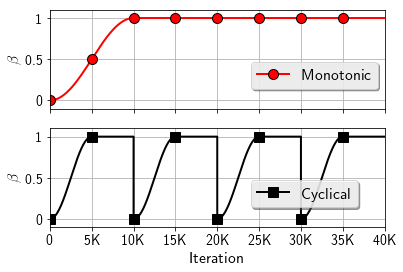

In [28]:
n_epoch = 40000
beta_np_cyc = frange_cycle_cosine(0.0, 1.0, n_epoch, 4)
beta_np_inc = frange_cycle_cosine(0.0, 1.0, n_epoch, 1, 0.25)
beta_np_con = np.ones(n_epoch)

fig=plt.figure(figsize=(6,4.0))
stride = max( int(n_epoch / 8), 1)


plt.subplot(211)
plt.plot(range(n_epoch), beta_np_inc, '-', label='Monotonic', marker= 'o', color='r', markevery=stride,lw=2,  mec='k', mew=1 , markersize=10)

leg = plt.legend(fontsize=16, shadow=True, loc=(0.6, 0.2))
plt.grid(True)

plt.ylabel("$\\beta$", fontsize=16)

ax = plt.gca() 

# X-axis label
plt.xticks( (0, 5*1000, 10*1000, 15*1000, 20*1000, 25*1000, 30*1000, 35*1000, 40*1000), \
            (' ',' ',' ',' ',' ',' ',' ',' ',' '), color='k', size=14)

# Left Y-axis labels
plt.yticks((0.0, 0.5, 1.0), ('0', '0.5','1'), color='k', size=14)

plt.xlim(-10,n_epoch)
plt.ylim(-0.1,1.1)


plt.subplot(212)
plt.plot(range(n_epoch), beta_np_cyc, '-', label='Cyclical', marker= 's', color='k', markevery=stride,lw=2,  mec='k', mew=1 , markersize=10)


leg = plt.legend(fontsize=16, shadow=True, loc=(0.6, 0.2))
plt.grid(True)

plt.xlabel('# Iteration', fontsize=16)
plt.ylabel("$\\beta$", fontsize=16)

ax = plt.gca() 

# X-axis label
plt.xticks( (0, 5*1000, 10*1000, 15*1000, 20*1000, 25*1000, 30*1000, 35*1000, 40*1000), \
           ('0','5K','10K','15K','20K','25K','30K','35K','40K'), color='k', size=14)

# Left Y-axis labels
plt.yticks((0.0, 0.5, 1.0), ('0', '0.5','1'), color='k', size=14)

plt.xlim(-10,n_epoch)
plt.ylim(-0.1,1.1)

plt.show()

fig.savefig(dirName+'/beta_iteration_cosine2.pdf', bbox_inches='tight')

